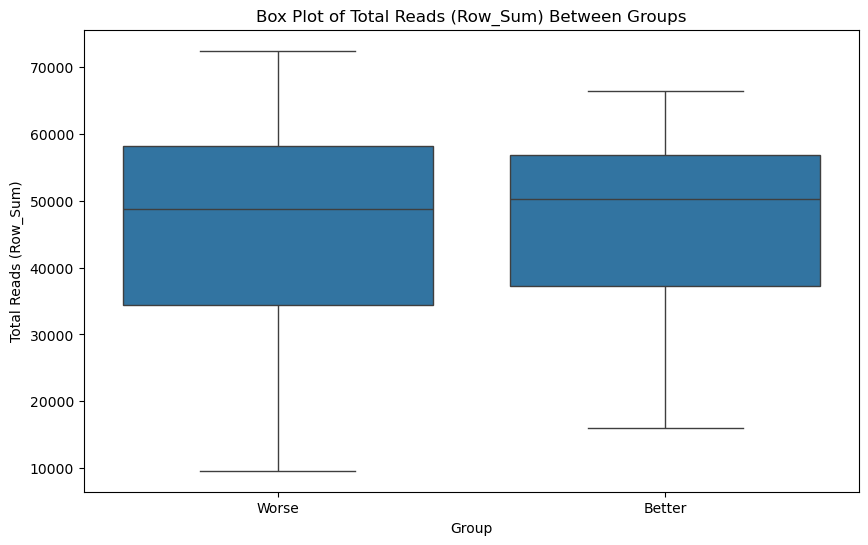

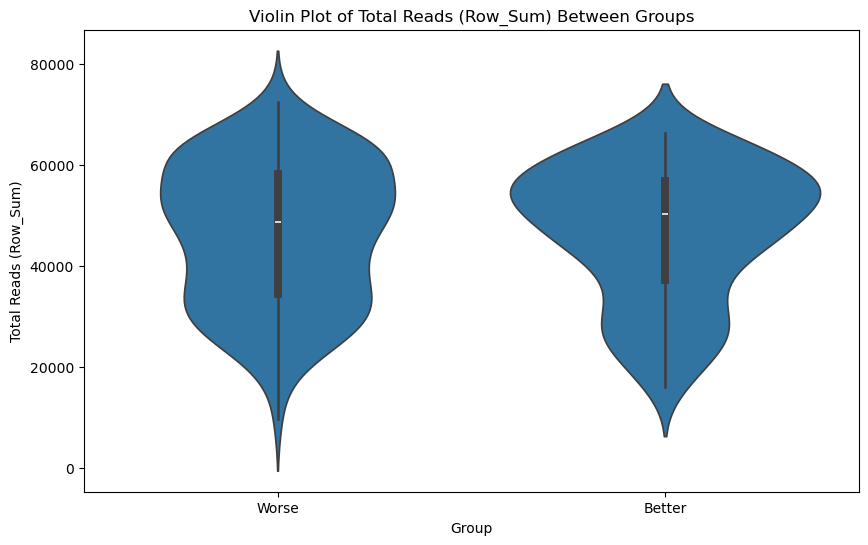

T-test: t-statistic = 0.26256552180871984, p-value = 0.7930604447473655
Mann-Whitney U test: U-statistic = 12283.0, p-value = 0.8081745285938924


In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, mannwhitneyu

# Load data
df = pd.read_csv("../FINAL_SPECIES_RAW.csv")

# Remove 'Row_Sum' column if it exists to avoid adding up twice
if 'Row_Sum' in df.columns:
    df = df.drop(columns=['Row_Sum'])

# Extract reads data and compute total reads per sample
reads = df.iloc[:, 14:]  # Assuming the reads data starts from the 14th column onwards
df['Row_Sum'] = reads.sum(axis=1)

# Ensure 'Group' column is present
if 'Group' not in df.columns:
    raise ValueError("The 'Group' column is not found in the DataFrame.")

# Plot the distribution of Row_Sum between the two groups
plt.figure(figsize=(10, 6))
sns.boxplot(x='Group', y='Row_Sum', data=df)
plt.title('Box Plot of Total Reads (Row_Sum) Between Groups')
plt.xlabel('Group')
plt.ylabel('Total Reads (Row_Sum)')
plt.savefig('mDNA_row_sum_boxplot.png')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x='Group', y='Row_Sum', data=df)
plt.title('Violin Plot of Total Reads (Row_Sum) Between Groups')
plt.xlabel('Group')
plt.ylabel('Total Reads (Row_Sum)')
plt.savefig('mDNA_row_sum_violinplot.png')
plt.show()

# Perform statistical tests
group_1 = df[df['Group'] == 'Better']['Row_Sum']
group_2 = df[df['Group'] == 'Worse']['Row_Sum']

# Perform an independent t-test
t_stat, t_p_value = ttest_ind(group_1, group_2)
print(f"T-test: t-statistic = {t_stat}, p-value = {t_p_value}")

# Perform a Mann-Whitney U test (non-parametric test)
u_stat, u_p_value = mannwhitneyu(group_1, group_2)
print(f"Mann-Whitney U test: U-statistic = {u_stat}, p-value = {u_p_value}")


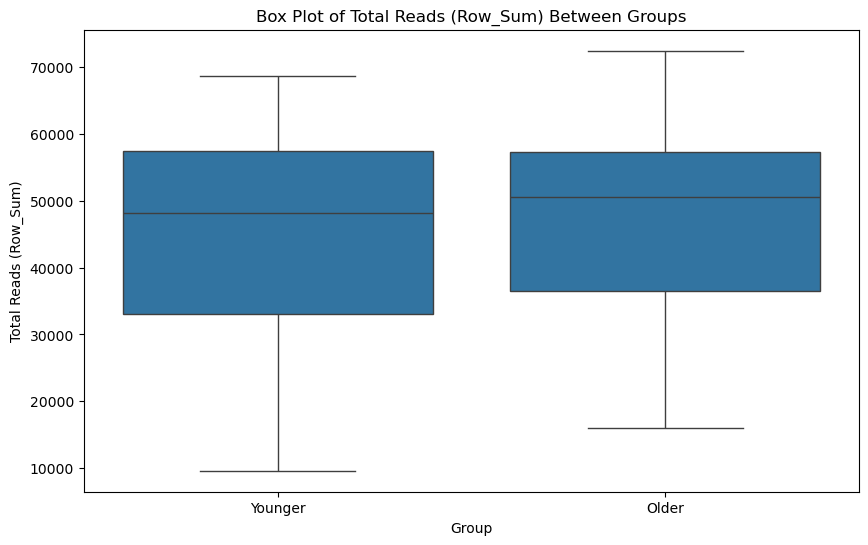

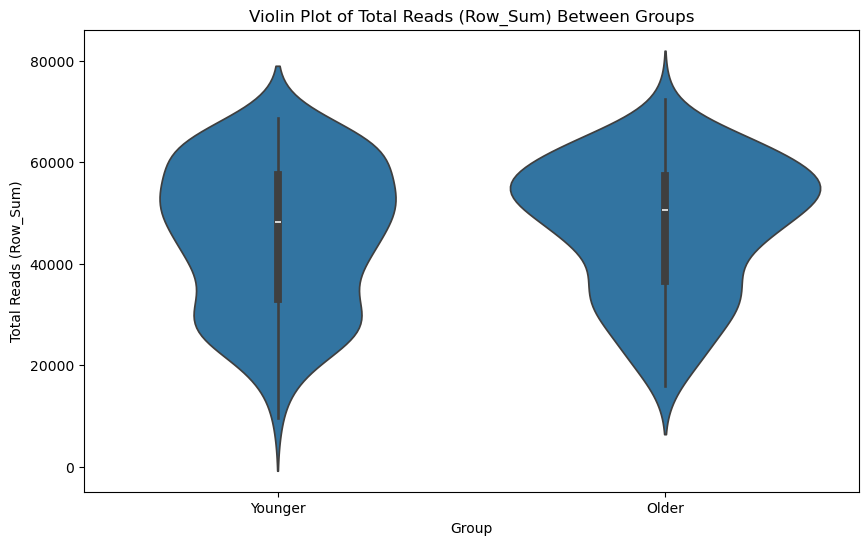

T-test: t-statistic = -1.1904771504032032, p-value = 0.2347726704804387
Mann-Whitney U test: U-statistic = 11225.0, p-value = 0.2755764126240373


In [9]:

#do same test as well for chronological age grouping

# Assuming 'df' is your DataFrame
median_age = df['Age'].median()

# Assigning 'Younger' or 'Older' based on the median
df['Group'] = df['Age'].apply(lambda x: 'Younger' if x < median_age else 'Older')

# Remove 'Row_Sum' column if it exists to avoid adding up twice
if 'Row_Sum' in df.columns:
    df = df.drop(columns=['Row_Sum'])

# Extract reads data and compute total reads per sample
reads = df.iloc[:, 14:]  # Assuming the reads data starts from the 14th column onwards
df['Row_Sum'] = reads.sum(axis=1)

# Ensure 'Group' column is present
if 'Group' not in df.columns:
    raise ValueError("The 'Group' column is not found in the DataFrame.")

# Plot the distribution of Row_Sum between the two groups
plt.figure(figsize=(10, 6))
sns.boxplot(x='Group', y='Row_Sum', data=df)
plt.title('Box Plot of Total Reads (Row_Sum) Between Groups')
plt.xlabel('Group')
plt.ylabel('Total Reads (Row_Sum)')
plt.savefig('ChrAge_row_sum_boxplot.png')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x='Group', y='Row_Sum', data=df)
plt.title('Violin Plot of Total Reads (Row_Sum) Between Groups')
plt.xlabel('Group')
plt.ylabel('Total Reads (Row_Sum)')
plt.savefig('ChrAge_row_sum_violinplot.png')
plt.show()

# Perform statistical tests
group_1 = df[df['Group'] == 'Younger']['Row_Sum']
group_2 = df[df['Group'] == 'Older']['Row_Sum']

# Perform an independent t-test
t_stat, t_p_value = ttest_ind(group_1, group_2)
print(f"T-test: t-statistic = {t_stat}, p-value = {t_p_value}")

# Perform a Mann-Whitney U test (non-parametric test)
u_stat, u_p_value = mannwhitneyu(group_1, group_2)
print(f"Mann-Whitney U test: U-statistic = {u_stat}, p-value = {u_p_value}")

